<a href="https://colab.research.google.com/github/xuanthang482/CS114.K21/blob/master/fake_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
#load file kaggle.json 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hongxunthng","key":"ad6984c1ea975fd6028fc7603020016f"}'}

In [4]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 67 Jun 26 14:22 kaggle.json


In [5]:
#load bộ data từ kaggle 
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 81% 33.0M/41.0M [00:00<00:00, 70.3MB/s]
100% 41.0M/41.0M [00:00<00:00, 69.8MB/s]


In [6]:
#giải nén data
!unzip fake-and-real-news-dataset

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [10]:
#đọc file bằng hàm read csv 
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [11]:
# thêm label cho tin real và fake 
real['category'] = 1
fake['category'] = 0

In [12]:
#cộng hai dataframe lại với nhau 
df = pd.concat([real,fake])
df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [13]:
#check có bị missing value ở các columns không
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [17]:
df.title.count()

44898

In [16]:
#kiểm tra số lượng bào báo theo mỗi chủ đề 
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [18]:
df['text'] = df['text'] + " " + df['title'] + " " + df['subject']
del df['title']
del df['subject']
del df['date']


In [19]:
df

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [20]:
#pp xóa đi những từ xuất hiện nhiều và không mang ý nghĩa trong câu 
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [35]:
print(stop)

{'under', 'him', 'then', 'so', "hadn't", "isn't", 'ain', 'as', 'can', "wouldn't", 'your', 'against', 'after', '+', 'has', 'did', 'mightn', 'them', 'this', 's', '$', "won't", 'wouldn', 'mustn', 'had', 'shouldn', '.', 'on', "you've", 'won', '_', 'below', 'ma', 'theirs', 'while', ':', 'which', 'o', "weren't", 'i', 'ours', "you're", "doesn't", 'you', 'it', 'from', 'now', '|', '<', 'any', 'only', 'yourselves', 'their', 'out', 'will', "you'd", 'through', 'but', "she's", 'to', 'than', 't', 'm', '(', '`', 'don', "that'll", 'its', 'when', 'weren', "should've", 'themselves', 'off', '=', 'we', "'", "shouldn't", ']', 'ourselves', '*', 'does', "mightn't", 'having', 'such', 'with', '~', 'a', 'doing', 'his', 'is', '@', 'what', 'd', 'needn', 'herself', '#', "hasn't", 'be', 'about', 'why', 'very', 've', 'that', 'all', 'how', "needn't", 'where', '?', "haven't", 'yourself', ';', 'once', 'those', 'too', '/', 'an', 'am', '>', 'were', 'who', '{', 'because', 'before', 'and', 'doesn', 'they', "didn't", 'me', 

In [22]:
# đưa các thành phần trong câu  trở về dạng ban đầu của nó 
#vd: studies -> study
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)    

In [23]:
df.text = df.text.apply(stem_text)

In [24]:
df['text'][0]

0    washington (reuters) head conserv republican f...
0    donald trump wish american happi new year leav...
Name: text, dtype: object

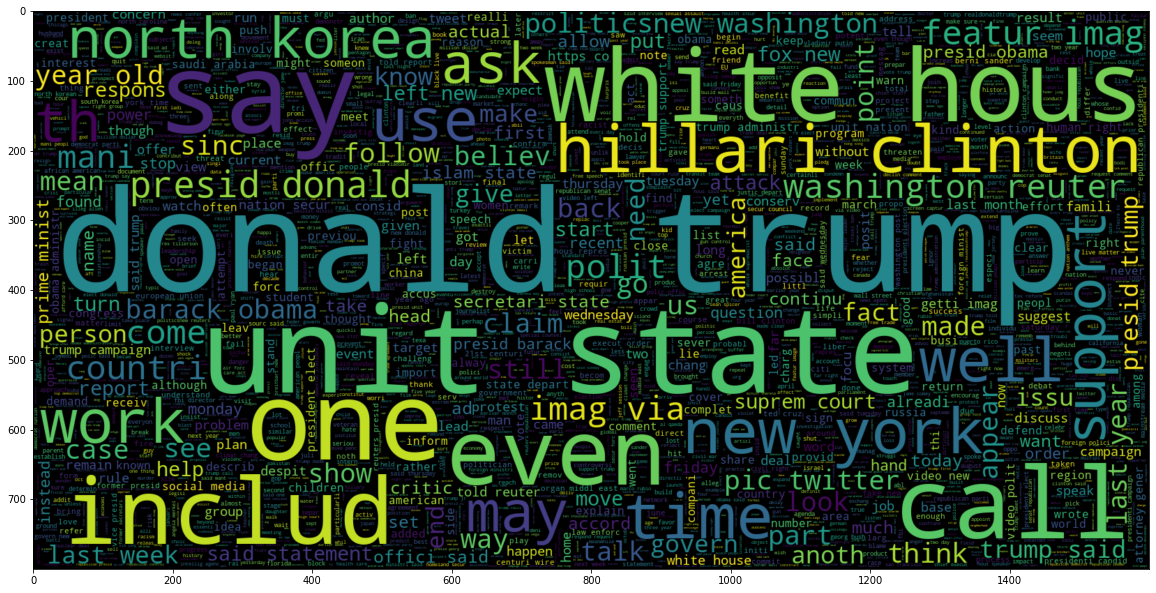

In [25]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

In [26]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category)

In [27]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (33673, 1953656)
BOW_cv_test: (11225, 1953656)


In [28]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [29]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [30]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5
33673/33673 [==============================] - 652s 19ms/step - loss: 0.6916 - accuracy: 0.5235
Epoch 2/5
33673/33673 [==============================] - 643s 19ms/step - loss: 0.0741 - accuracy: 0.9820
Epoch 3/5
33673/33673 [==============================] - 642s 19ms/step - loss: 0.0382 - accuracy: 0.9901
Epoch 4/5
33673/33673 [==============================] - 643s 19ms/step - loss: 0.0379 - accuracy: 0.9901
Epoch 5/5
33673/33673 [==============================] - 642s 19ms/step - loss: 0.0378 - accuracy: 0.9901


In [31]:
pred = model.predict(cv_test_reviews)

In [32]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [33]:
accuracy_score(pred,y_test)

0.901380846325167

In [ ]:
new_input=str(input('nhap vao tin tuc ban muon kiem dinh fake news :'))
new_input=[]
data_input = pd.DataFrame({
    'text': new_input })
data_input['text'] =data_input['text'] .apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))
ps = PorterStemmer()
data_input['text'] = data_input['text'].apply(lambda x: x.split())
data_input['text']= data_input['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x]))
arr_input = tv.transform(data_input['text']).toarray()
if lsvc.predict(arr_input) ==1 :
  print('real')
else : print('face')